<a href="https://colab.research.google.com/github/aboutvitor/aboutvitor/blob/main/Portal_da_Transpar%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análises gastos com viagens
# Portal da Transparência (2024)

Dados disponíveis em "https://portaldatransparencia.gov.br/download-de-dados"

Importação dos dados

In [ ]:
dados_viagem = "/content/drive/MyDrive/Programação.Dados/Portal da transparência/2024_Viagem.csv"
dados_passagem = "/content/drive/MyDrive/Programação.Dados/Portal da transparência/2024_Passagem.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.2f}'.format)

df_viagens = pd.read_csv(dados_viagem, encoding="Windows-1252", sep=";", decimal=",")
df_passagem = pd.read_csv(dados_passagem, encoding="Windows-1252", sep=";", decimal=",")

In [ ]:
#Inclusão de Despesas ao relatório
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos'] - df_viagens['Valor devolução']

Órgaos com maior número de viagens

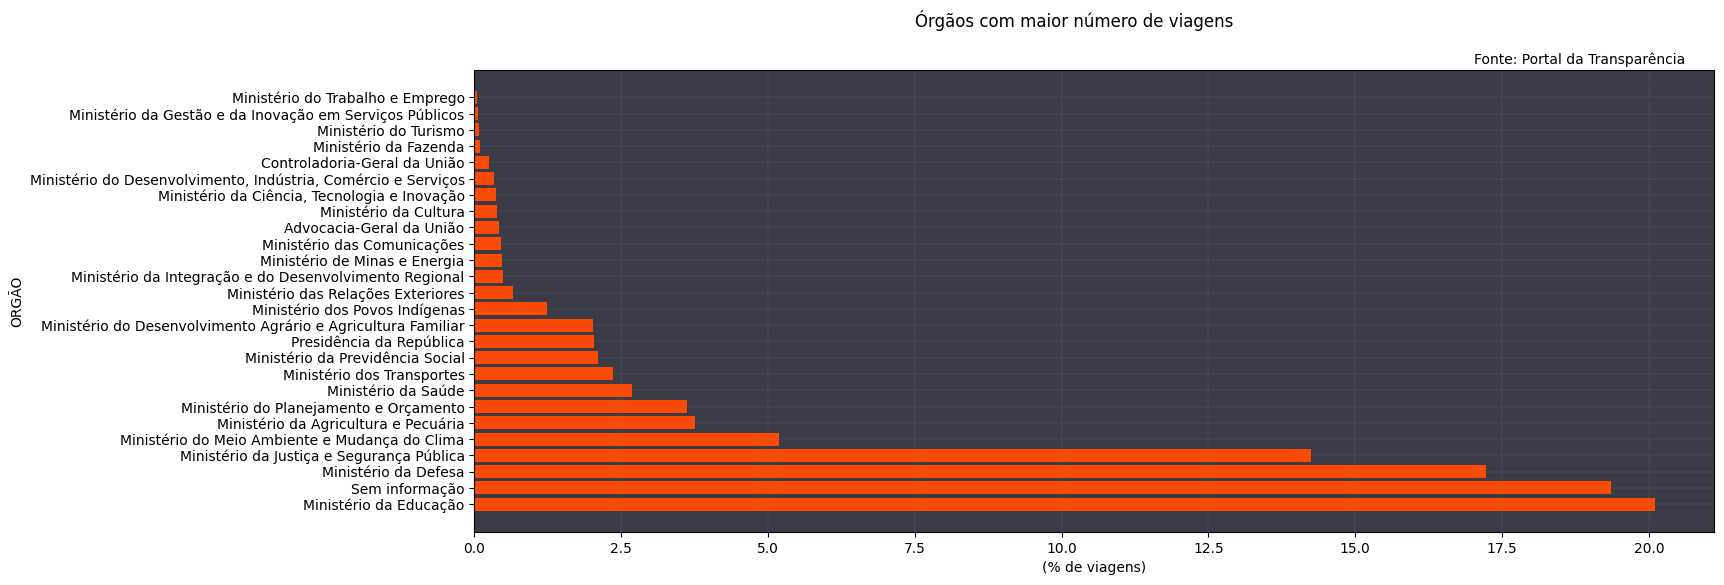

In [ ]:
orgaos_qtd = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')


fig,ax = plt.subplots(figsize=(16,6))
ax.barh(orgaos_qtd['Nome do órgão superior'],orgaos_qtd['Quantidade (%)'], color='#fc4903')
ax.set_facecolor('#3b3b47')
plt.xlabel('(% de viagens)')
plt.grid(color='gray',linestyle="--",linewidth=0.2)
plt.figtext(0.75,0.89, 'Fonte: Portal da Transparência')
plt.ylabel('ORGÃO')
fig.suptitle('Órgãos com maior número de viagens')
plt.show()


Despesas por cargo

In [ ]:
df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

,Cargo,Despesas
465,Informações protegidas por sigilo,392528120.06
595,PROFESSOR DO MAGISTERIO SUPERIOR,110914148.68
596,PROFESSOR ENS BASICO TECN TECNOLOGICO,51405480.59
714,TECNICO DO SEGURO SOCIAL,44108743.59
91,ANALISTA AMBIENTAL,35658500.06
...,...,...
538,OPERADOR DE CONSOLE,122.05
361,DIRETOR DE ILUMINACAO,122.05
594,PROFESSOR DO ENSINO BASICO EX-TERRITORIO,0.00
535,OPERADOR DE CENTRAL HIDRELETRICA,0.00


Despesas por órgão

In [ ]:
df_viagens.groupby('Nome do órgão superior')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

,Nome do órgão superior,Despesas
25,Sem informação,721597757.74
10,Ministério da Justiça e Segurança Pública,347260777.46
5,Ministério da Defesa,306338345.51
6,Ministério da Educação,273950367.42
18,Ministério do Meio Ambiente e Mudança do Clima,119746384.89
12,Ministério da Saúde,88288540.99
11,Ministério da Previdência Social,62325175.18
14,Ministério das Relações Exteriores,60146928.56
23,Ministério dos Transportes,52322379.07
24,Presidência da República,51699551.19


Orgãos com mais de 1% da ocorrência das viagens

In [ ]:
viagens_por_orgao = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')
filtro_1_porcento = viagens_por_orgao['Quantidade (%)'] > 1

viagens_por_orgao[filtro_1_porcento]



,Nome do órgão superior,Quantidade (%)
0,Ministério da Educação,20.11
1,Sem informação,19.36
2,Ministério da Defesa,17.23
3,Ministério da Justiça e Segurança Pública,14.25
4,Ministério do Meio Ambiente e Mudança do Clima,5.19
5,Ministério da Agricultura e Pecuária,3.75
6,Ministério do Planejamento e Orçamento,3.62
7,Ministério da Saúde,2.68
8,Ministério dos Transportes,2.35
9,Ministério da Previdência Social,2.10


Gastos por Ministério


In [ ]:
viagens_por_orgao = (df_viagens['Nome do órgão superior'].value_counts(normalize=True)*100).reset_index(name='Quantidade (%)')

In [ ]:
filtro_ministerio = viagens_por_orgao['Nome do órgão superior'].str.startswith('Ministério')
viagens_por_orgao[filtro_ministerio]


,Nome do órgão superior,Quantidade (%)
0,Ministério da Educação,20.11
2,Ministério da Defesa,17.23
3,Ministério da Justiça e Segurança Pública,14.25
4,Ministério do Meio Ambiente e Mudança do Clima,5.19
5,Ministério da Agricultura e Pecuária,3.75
6,Ministério do Planejamento e Orçamento,3.62
7,Ministério da Saúde,2.68
8,Ministério dos Transportes,2.35
9,Ministério da Previdência Social,2.10
11,Ministério do Desenvolvimento Agrário e Agricu...,2.01


Cargos que gastaram mais de 10 milhões em viagens

In [ ]:
viagens_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

filtro_10M = viagens_por_cargo['Despesas']>= 10000000

viagens_por_cargo[filtro_10M]


,Cargo,Despesas
465,Informações protegidas por sigilo,392528120.06
595,PROFESSOR DO MAGISTERIO SUPERIOR,110914148.68
596,PROFESSOR ENS BASICO TECN TECNOLOGICO,51405480.59
714,TECNICO DO SEGURO SOCIAL,44108743.59
91,ANALISTA AMBIENTAL,35658500.06
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,32510548.02
411,ESP EM REGULACAO E VIGILANCIA SANITARIA,26554994.81
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,24824783.51
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,20387705.07
199,ASSISTENTE EM ADMINISTRAçãO,15427769.75


Cargos e CPF's não transmitidos

In [ ]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('Informação não transmitida')
filtro = df_viagens['Cargo'] == 'Informação não transmitida'
quantidade = filtro.sum()
print(f"O números de informações não informadas de Cargos é de {quantidade} ocorrências")

CPF_faltando = df_viagens['CPF viajante'].isna().sum()
print(f"O números de informações não informadas de CPF's é de {CPF_faltando} ocorrências")




O números de informações não informadas de Cargos é de 295703 ocorrências
O números de informações não informadas de CPF's é de 125339 ocorrências


In [ ]:
#Definição e formatação de colunas de datas no relatório
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens ['Período - Data de início'], format="%d/%m/%Y")
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'] , format="%d/%m/%Y")
df_viagens['Quantidade de dias'] = (df_viagens['Período - Data de fim']- df_viagens['Período - Data de início']).dt.days
df_viagens ['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()

Relação de gastos com a quantidade de dias

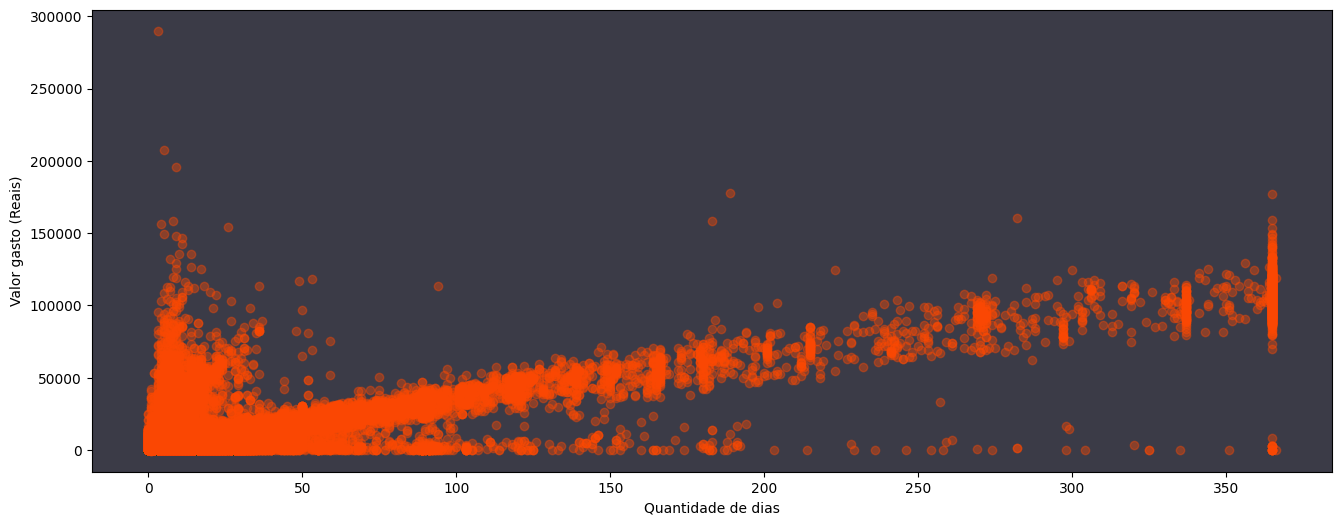

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
ax.scatter(df_viagens['Quantidade de dias'], df_viagens['Despesas'], alpha=0.4, color='#fc4903')
ax.set_facecolor('#3b3b47')
plt.xlabel ('Quantidade de dias')
plt.ylabel ('Valor gasto (Reais)')
plt.show()

Passagens que custaram mais de 150 mil reais

In [ ]:
filtro_mais_de_150k = df_viagens['Despesas']>150_000
df_viagens[filtro_mais_de_150k]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Quantidade de dias,Mês da viagem
1491,19608215,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID000200137,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-01-15,2024-07-16,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,137003.49,12154.78,0.00,8944.06,158102.33,183,January
6757,19661448,000028/24-12C,Realizada,SIM,Em continuidade a PCDP 542/23.,-1,Sem informação,-1,Sem informação,***.360.192-**,RAILANA BERENICE AMORAS OLIVEIRA,Informação não transmitida,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Macapá/AP, Brasília/DF, Brasília/...",Em complemento a PCDP 542/23 - CENTRO DE CUSTO...,117211.94,36122.52,0.00,0.00,153334.46,365,January
9681,19668216,000844/24-17C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",-1,Sem informação,-1,Sem informação,***.468.361-**,BRUNO REZENDE CABRAL,Informação não transmitida,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade a PCDP 051838/23 - Centro de C...,118425.85,58502.93,0.00,0.00,176928.78,365,January
13279,19673150,001658/24-11C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",-1,Sem informação,-1,Sem informação,***.764.623-**,ALKIMAR SAMPAIO DE SOUZA,Informação não transmitida,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Manaus/AM, Tabatinga/AM, Manaus/A...",Em continuidade à PCDP: 27230/23. Centro de Cu...,118144.60,41329.59,0.00,0.00,159474.19,365,January
119328,19805066,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,-1,Sem informação,-1,Sem informação,NaN,Sem Informação,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-03-24,2024-12-31,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,93958.90,67091.46,822.73,0.00,160227.63,282,March
239430,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unidade...,***.693.051-**,IRAJA REZENDE DE LACERDA,Informação não transmitida,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,195861.40,9,May
261976,19989596,014282/24,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,290096.16,3,June
328646,20073775,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006400272,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-07-07,2025-01-12,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,153371.34,12503.74,0.00,11755.96,177631.04,189,July
356900,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,Informação não transmitida,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,207897.47,5,July
502162,20301922,010873/24-1C,Reali

Quantidade de dias de viagem por órgão

In [ ]:
qtd_viagem = df_viagens.groupby('Nome do órgão superior')['Quantidade de dias'].sum().reset_index().sort_values('Quantidade de dias', ascending=False)
print(qtd_viagem)

                               Nome do órgão superior  Quantidade de dias
25                                     Sem informação             1541660
10          Ministério da Justiça e Segurança Pública              765934
5                                Ministério da Defesa              639276
6                              Ministério da Educação              417879
18     Ministério do Meio Ambiente e Mudança do Clima              322089
11                   Ministério da Previdência Social              138745
22                     Ministério dos Povos Indígenas               97239
12                                Ministério da Saúde               95967
16  Ministério do Desenvolvimento Agrário e Agricu...               81768
19             Ministério do Planejamento e Orçamento               66800
2                Ministério da Agricultura e Pecuária               61395
23                         Ministério dos Transportes               50550
14                 Ministério das Rela

Resumo de analise (órgão)

In [ ]:
(df_viagens.
 groupby('Nome do órgão superior')
 .agg(
     Gasto_por_orgao=('Despesas','mean'),
     Duracao_media=('Quantidade de dias','mean'),
     Despesas_totais=('Despesas','sum'),
     Destinos_frequentes=('Destinos', pd.Series.mode),
     ).sort_values('Gasto_por_orgao', ascending=False)
 .reset_index()
 )

,Nome do órgão superior,Gasto_por_orgao,Duracao_media,Despesas_totais,Destinos_frequentes
0,Ministério das Relações Exteriores,11777.35,8.68,60146928.56,Sem informação
1,Ministério do Turismo,8204.89,3.49,4939346.76,Belém/PA
2,Ministério da Fazenda,5406.38,1.55,3881783.48,São Paulo/SP
3,Ministério do Trabalho e Emprego,5399.42,2.87,1576631.68,Brasília/DF
4,Ministério da Gestão e da Inovação em Serviços...,4903.97,2.93,2025338.28,Brasília/DF
5,Sem informação,4822.26,10.30,721597757.74,Brasília/DF
6,Ministério de Minas e Energia,4479.86,2.90,16073723.04,São Paulo/SP
7,Ministério da Saúde,4253.84,4.62,88288540.99,Brasília/DF
8,Ministério das Comunicações,4215.18,3.52,14677255.65,Brasília/DF
9,Ministério dos Povos Indígenas,3947.96,10.11,37971484.00,Brasília/DF


Cargos com mais de 1% das viagens

In [ ]:
df_cargos = (df_viagens['Cargo']
             .value_counts(normalize=True)
             .reset_index()
             )
df_cargos.loc[df_cargos['proportion']>0.01]

,Cargo,proportion
0,Informação não transmitida,0.38
1,Informações protegidas por sigilo,0.15
2,PROFESSOR DO MAGISTERIO SUPERIOR,0.06
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.04
4,CONTRATADO LEI 8745/93 - NI,0.02
5,AUDITOR FISCAL FEDERAL AGROPECUARIO,0.02
6,ANALISTA AMBIENTAL,0.02
7,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,0.01
8,ASSISTENTE EM ADMINISTRAçãO,0.01
9,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,0.01


In [ ]:
df_viagem_consolidado = (
    df_viagens.
    groupby('Cargo')
    .agg(
     gasto_por_orgao=('Despesas','mean'),
     duracao_media=('Quantidade de dias','mean'),
     despesas_totais=('Despesas','sum'),
     destinos_frequentes=('Destinos', pd.Series.mode),
     N_viagens=('Nome','count')
     )
 .reset_index()
 )
cargos_relevantes = df_cargos.loc[df_cargos['proportion']>0.01, 'Cargo']

In [ ]:
filtro_c = df_viagem_consolidado['Cargo'].isin(cargos_relevantes)
df_viagem_consolidado[filtro_c]


,Cargo,gasto_por_orgao,duracao_media,despesas_totais,destinos_frequentes,N_viagens
91,ANALISTA AMBIENTAL,2798.06,5.18,35658500.06,Brasília/DF,12744
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,2039.59,3.42,20387705.07,Brasília/DF,9996
199,ASSISTENTE EM ADMINISTRAçãO,1497.11,2.25,15427769.75,Brasília/DF,10305
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,1534.76,2.06,24824783.51,Brasília/DF,16175
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2911.04,3.14,32510548.02,Brasília/DF,11168
334,CONTRATADO LEI 8745/93 - NI,838.94,2.26,14424687.97,Fortaleza/CE,17194
465,Informação não transmitida,3589.06,7.71,1061296229.81,Brasília/DF,295703
466,Informações protegidas por sigilo,3348.64,7.30,392528120.06,Informações protegidas por sigilo,117220
596,PROFESSOR DO MAGISTERIO SUPERIOR,2210.55,3.66,110914148.68,Brasília/DF,50175
597,PROFESSOR ENS BASICO TECN TECNOLOGICO,1518.36,2.35,51405480.59,Brasília/DF,33856
